<a href="https://colab.research.google.com/github/Ecaballero333/Obligatorio_ML/blob/develop/VallarinoIgnacio_CaballeroEduardo_Obligatorio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obligatorio



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files 


uploaded = files.upload()

Saving nuevo_dataset.csv to nuevo_dataset.csv


In [3]:
df=pd.read_csv("nuevo_dataset.csv", sep = ",")

## Análisis exploratorio

In [4]:
df.head(100)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,Female,22,1,19.0,1,< 1 Year,No,54559.0,152.0,87,0
1,186555,Male,57,1,18.0,0,1-2 Year,Yes,33439.0,124.0,63,0
2,158037,Female,64,1,28.0,0,1-2 Year,Yes,39327.0,122.0,45,0
3,343706,Male,52,1,41.0,1,1-2 Year,No,26536.0,124.0,161,0
4,137903,Female,21,1,7.0,0,< 1 Year,No,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,196823,Male,51,1,28.0,0,1-2 Year,Yes,54154.0,26.0,272,0
96,293262,Male,35,1,46.0,0,1-2 Year,No,22241.0,154.0,267,0
97,260666,Male,24,1,14.0,1,< 1 Year,No,16288.0,152.0,236,0
98,14316,Female,23,1,13.0,1,< 1 Year,No,28760.0,152.0,166,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    93891 non-null  int64  
 1   Gender                93891 non-null  object 
 2   Age                   93891 non-null  int64  
 3   Driving_License       93891 non-null  int64  
 4   Region_Code           93891 non-null  float64
 5   Previously_Insured    93891 non-null  int64  
 6   Vehicle_Age           93891 non-null  object 
 7   Vehicle_Damage        93891 non-null  object 
 8   Annual_Premium        93891 non-null  float64
 9   Policy_Sales_Channel  93891 non-null  float64
 10  Vintage               93891 non-null  int64  
 11  Response              93891 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 8.6+ MB


### Convertir Variables

Variables que están definidas como número pero son categoricas:
* Driving_License: valores posibles -> 0 y 1
* Previously_Insured: valores posibles -> 0 y 1
* Response: Es el target. Valores posibles -> 0 y 1

Las pasamos a string (excepto "response") en un primer lugar para poder hacerlas Dummy y luego poder usarlas en analisis de correlacion. 

In [6]:
# Conversión variable categórica
df['Driving_License'] = df['Driving_License'].astype('str')
df['Previously_Insured'] = df['Previously_Insured'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    93891 non-null  int64  
 1   Gender                93891 non-null  object 
 2   Age                   93891 non-null  int64  
 3   Driving_License       93891 non-null  object 
 4   Region_Code           93891 non-null  float64
 5   Previously_Insured    93891 non-null  object 
 6   Vehicle_Age           93891 non-null  object 
 7   Vehicle_Damage        93891 non-null  object 
 8   Annual_Premium        93891 non-null  float64
 9   Policy_Sales_Channel  93891 non-null  float64
 10  Vintage               93891 non-null  int64  
 11  Response              93891 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.6+ MB


In [7]:
# Creacion de dummies para variables categoricas.
dfDummy = pd.get_dummies(df, drop_first = True)
dfDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     93891 non-null  int64  
 1   Age                    93891 non-null  int64  
 2   Region_Code            93891 non-null  float64
 3   Annual_Premium         93891 non-null  float64
 4   Policy_Sales_Channel   93891 non-null  float64
 5   Vintage                93891 non-null  int64  
 6   Response               93891 non-null  int64  
 7   Gender_Male            93891 non-null  uint8  
 8   Driving_License_1      93891 non-null  uint8  
 9   Previously_Insured_1   93891 non-null  uint8  
 10  Vehicle_Age_< 1 Year   93891 non-null  uint8  
 11  Vehicle_Age_> 2 Years  93891 non-null  uint8  
 12  Vehicle_Damage_Yes     93891 non-null  uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 5.6 MB


### Outliers

In [8]:
dfDummy.describe(include = [np.number])

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
count,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000
mean,190515.346806,40.806520,26.556092,30983.086547,103.525716,154.679415,0.497492,0.570545,0.998477,0.264296,0.313481,0.068036,0.706532
std,109947.403429,14.368874,12.645412,17687.544914,55.814796,83.567929,0.499996,0.495001,0.038997,0.440960,0.463910,0.251810,0.455353
min,1.000000,20.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95254.500000,27.000000,16.000000,24506.000000,26.000000,82.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,190640.000000,41.000000,28.000000,32232.000000,124.000000,155.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,285907.500000,50.000000,34.000000,40299.000000,152.000000,227.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,381098.000000,85.000000,52.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from scipy.stats.mstats import winsorize

In [10]:
plt.figure(figsize = (3,5))
sns.set_theme(style="whitegrid")

<Figure size 216x360 with 0 Axes>

Outliers de variable Age


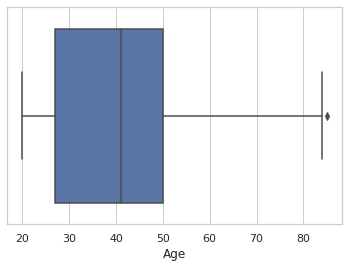

In [11]:
print('Outliers de variable Age')
sns.boxplot(x = 'Age', data = dfDummy)

Detecamos un outlier para la variable "Age". Procederemos a eliminarlo...


Outliers de variable Age_Winzorized


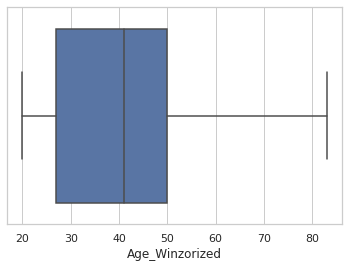

In [12]:
dfDummy['Age_Winzorized'] = winsorize(dfDummy['Age'], limits = [None, 0.0001])
print('Outliers de variable Age_Winzorized')
sns.boxplot(x = 'Age_Winzorized', data = dfDummy)

Outliers de variable Annual_Premium


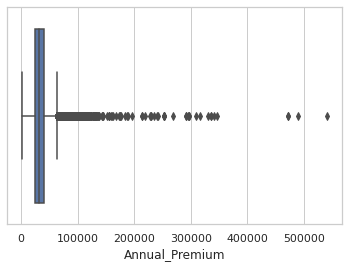

In [13]:
print('Outliers de variable Annual_Premium')
sns.boxplot(x = 'Annual_Premium', data = dfDummy)

Detectamos varios outliers para la variable "Annual_Premium". Procederemos a eliminarlos...

Outliers de variable Annual_Premium_Winzorized


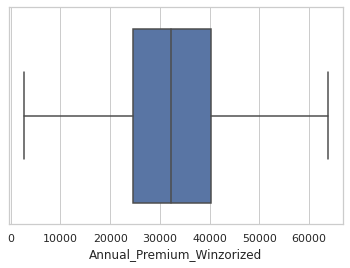

In [14]:
dfDummy['Annual_Premium_Winzorized'] = winsorize(dfDummy['Annual_Premium'], limits = [None, 0.025])
print('Outliers de variable Annual_Premium_Winzorized')
sns.boxplot(x = 'Annual_Premium_Winzorized', data = dfDummy)

Outliers de variable Vintage


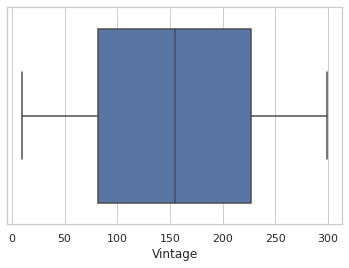

In [15]:
print('Outliers de variable Vintage')
sns.boxplot(x = 'Vintage', data = dfDummy)

Eliminamos las columnas que son "winzorized": Age y Annual_Premium

In [16]:
dfDummy = dfDummy.drop(['Age', 'Annual_Premium'], axis=1)

In [17]:
dfDummy

,id,Region_Code,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Winzorized,Annual_Premium_Winzorized
0,79510,19.0,152.0,87,0,0,1,1,1,0,0,22,54559.0
1,186555,18.0,124.0,63,0,1,1,0,0,0,1,57,33439.0
2,158037,28.0,122.0,45,0,0,1,0,0,0,1,64,39327.0
3,343706,41.0,124.0,161,0,1,1,1,0,0,0,52,26536.0
4,137903,7.0,152.0,92,0,0,1,0,1,0,0,21,28416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,381058,46.0,26.0,189,1,1,1,0,0,0,1,40,27508.0
93887,381062,28.0,124.0,99,1,0,1,0,0,0,1,41,37377.0
93888,381074,28.0,124.0,167,1,0,1,0,0,0,1,46,34741.0
93889,381076,28.0,26.0,139,1,0,1,0,0,0,1,61,43875.0


### Filas repetidas

Según el reporte obtenido con pandas-profiling no hay filas repetidas. Igual probamos

In [18]:
print("Cantidad sin borrar",len(dfDummy))
dfDummy_without_duplicates = dfDummy.drop_duplicates()
print("Cantidad con borrado", len(dfDummy_without_duplicates))


Cantidad sin borrar 93891
Cantidad con borrado 93891


### Valores nulos

No hay variables nulas.

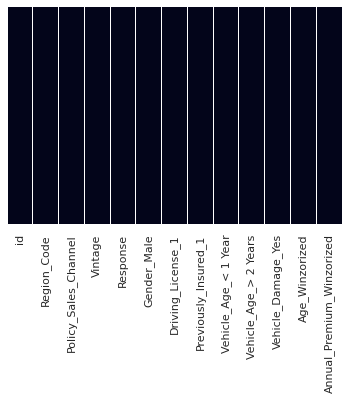

In [19]:
sns.heatmap(dfDummy.isnull(), cbar = False, yticklabels = False, xticklabels = True)

### Feature Scaling

Usamos la normalización porque:
-	No podemos asumir que la distribución de nuestros datos es gaussiana.
-	No tenemos outliers porque ya los eliminamos.

In [20]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [21]:
dfDummy_normAux = scaler.fit_transform(dfDummy)

In [22]:
dfDummy_normAux

array([[0.20863192, 0.36538462, 0.93209877, ..., 0.        , 0.03174603,
        0.84877658],
       [0.48951842, 0.34615385, 0.75925926, ..., 1.        , 0.58730159,
        0.50357137],
       [0.41468707, 0.53846154, 0.74691358, ..., 1.        , 0.6984127 ,
        0.5998104 ],
       ...,
       [0.99993702, 0.53846154, 0.75925926, ..., 1.        , 0.41269841,
        0.52485249],
       [0.99994227, 0.53846154, 0.15432099, ..., 1.        , 0.65079365,
        0.6741472 ],
       [1.        , 0.53846154, 0.15432099, ..., 1.        , 0.28571429,
        0.81907782]])

In [23]:
dfDummy_normalized = pd.DataFrame(dfDummy_normAux, columns = sorted(dfDummy))

In [24]:
dfDummy2 = pd.DataFrame(dfDummy, columns = sorted(dfDummy))
dfDummy2

,Age_Winzorized,Annual_Premium_Winzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
0,22,54559.0,1,0,152.0,1,19.0,0,1,0,0,87,79510
1,57,33439.0,1,1,124.0,0,18.0,0,0,0,1,63,186555
2,64,39327.0,1,0,122.0,0,28.0,0,0,0,1,45,158037
3,52,26536.0,1,1,124.0,1,41.0,0,0,0,0,161,343706
4,21,28416.0,1,0,152.0,0,7.0,0,1,0,0,92,137903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,40,27508.0,1,1,26.0,0,46.0,1,0,0,1,189,381058
93887,41,37377.0,1,0,124.0,0,28.0,1,0,0,1,99,381062
93888,46,34741.0,1,0,124.0,0,28.0,1,0,0,1,167,381074
93889,61,43875.0,1,0,26.0,0,28.0,1,0,0,1,139,381076


In [25]:
dfDummy_normalized

,Age_Winzorized,Annual_Premium_Winzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
0,0.208632,0.365385,0.932099,0.266436,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.031746,0.848777
1,0.489518,0.346154,0.759259,0.183391,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.587302,0.503571
2,0.414687,0.538462,0.746914,0.121107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.698413,0.599810
3,0.901883,0.788462,0.759259,0.522491,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.507937,0.390742
4,0.361855,0.134615,0.932099,0.283737,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.015873,0.421471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93886,0.999895,0.884615,0.154321,0.619377,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.317460,0.406630
93887,0.999906,0.538462,0.759259,0.307958,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.567938
93888,0.999937,0.538462,0.759259,0.543253,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.412698,0.524852
93889,0.999942,0.538462,0.154321,0.446367,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.650794,0.674147


### Análisis de correlación

In [26]:
d_cor = dfDummy_normalized.corr()
d_cor

,Age_Winzorized,Annual_Premium_Winzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vintage,id
Age_Winzorized,1.000000,-0.000327,0.001997,-0.002523,-0.003286,0.005085,-0.002911,0.003164,0.000701,-0.004702,-0.001973,0.002731,0.002147
Annual_Premium_Winzorized,-0.000327,1.000000,-0.035028,-0.005488,0.016278,-0.003781,0.003100,-0.023101,-0.034282,0.013191,0.025978,0.032374,-0.001270
Driving_License_1,0.001997,-0.035028,1.000000,0.003790,-0.207801,-0.090779,0.026948,0.228769,0.495390,-0.181666,-0.239369,-0.519569,-0.167470
Gender_Male,-0.002523,-0.005488,0.003790,1.000000,-0.006753,-0.001775,-0.001058,0.005661,0.003494,0.001171,-0.003744,-0.006477,0.000989
Policy_Sales_Channel,-0.003286,0.016278,-0.207801,-0.006753,1.000000,0.080682,0.016465,-0.588736,-0.341658,0.128924,0.595324,0.182061,0.033304
Previously_Insured_1,0.005085,-0.003781,-0.090779,-0.001775,0.080682,1.000000,-0.015677,-0.090274,-0.145536,0.049334,0.096432,0.131681,0.008915
Region_Code,-0.002911,0.003100,0.026948,-0.001058,0.016465,-0.015677,1.000000,0.000492,0.026392,-0.000294,-0.001779,-0.064070,-0.007420
Response,0.003164,-0.023101,0.228769,0.005661,-0.588736,-0.090274,0.000492,1.000000,0.403296,-0.161272,-0.853874,-0.261900,-0.010180
Vehicle_Age_< 1 Year,0.000701,-0.034282,0.495390,0.003494,-0.341658,-0.145536,0.026392,0.403296,1.000000,-0.182579,-0.415373,-0.732124,-0.030455
Vehicle_Age_> 2 Years,-0.004702,0.013191,-0.181666,0.001171,0.128924,0.049334,-0.000294,-0.161272,-0.182579,1.000000,0.173856,0.246683,0.101323


In [27]:
paletaColores = sns.diverging_palette(0, 100, sep = 10, as_cmap = False)

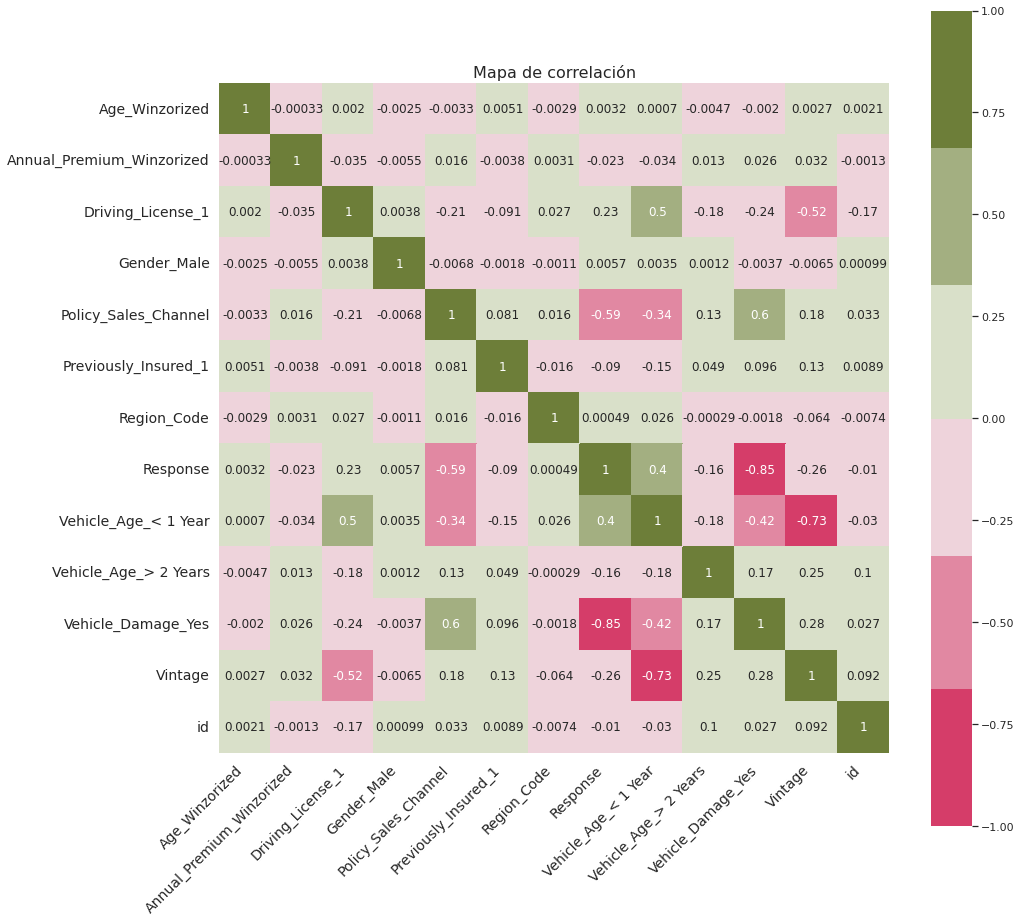

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(
    dfDummy_normalized.corr(),
    annot     = True,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = paletaColores,
    square    = True,
    ax        = ax
).set_title("Mapa de correlación", fontsize = 16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 14)

Consideramos una alta correlacion cuando el valor supera 0.68. Por otro lado, no tomamos en cuenta la variable "Response" por ser el target. Por lo tanto las correlaciones existentes son:

*   Vintage --> Vehicle_Age_> 1 Years

Dado a que Vehicle_Age_> 1 Years contiene menos correlacion con las demas variables, procedemos a eliminar Vintage para tener un cuadro menor de correlacion. Por otro lado, Vehicle_Age_> 1 Years tiene mas correlacion con Response (target), haciendolo mas relevante. 



####	Eliminación de variables altamente correlacionadas

In [29]:
df_sin_corr = dfDummy_normalized

df_sin_corr = df_sin_corr.drop(columns=['Vintage'])

df_sin_corr.corr()

,Age_Winzorized,Annual_Premium_Winzorized,Driving_License_1,Gender_Male,Policy_Sales_Channel,Previously_Insured_1,Region_Code,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,id
Age_Winzorized,1.000000,-0.000327,0.001997,-0.002523,-0.003286,0.005085,-0.002911,0.003164,0.000701,-0.004702,-0.001973,0.002147
Annual_Premium_Winzorized,-0.000327,1.000000,-0.035028,-0.005488,0.016278,-0.003781,0.003100,-0.023101,-0.034282,0.013191,0.025978,-0.001270
Driving_License_1,0.001997,-0.035028,1.000000,0.003790,-0.207801,-0.090779,0.026948,0.228769,0.495390,-0.181666,-0.239369,-0.167470
Gender_Male,-0.002523,-0.005488,0.003790,1.000000,-0.006753,-0.001775,-0.001058,0.005661,0.003494,0.001171,-0.003744,0.000989
Policy_Sales_Channel,-0.003286,0.016278,-0.207801,-0.006753,1.000000,0.080682,0.016465,-0.588736,-0.341658,0.128924,0.595324,0.033304
Previously_Insured_1,0.005085,-0.003781,-0.090779,-0.001775,0.080682,1.000000,-0.015677,-0.090274,-0.145536,0.049334,0.096432,0.008915
Region_Code,-0.002911,0.003100,0.026948,-0.001058,0.016465,-0.015677,1.000000,0.000492,0.026392,-0.000294,-0.001779,-0.007420
Response,0.003164,-0.023101,0.228769,0.005661,-0.588736,-0.090274,0.000492,1.000000,0.403296,-0.161272,-0.853874,-0.010180
Vehicle_Age_< 1 Year,0.000701,-0.034282,0.495390,0.003494,-0.341658,-0.145536,0.026392,0.403296,1.000000,-0.182579,-0.415373,-0.030455
Vehicle_Age_> 2 Years,-0.004702,0.013191,-0.181666,0.001171,0.128924,0.049334,-0.000294,-0.161272,-0.182579,1.000000,0.173856,0.101323


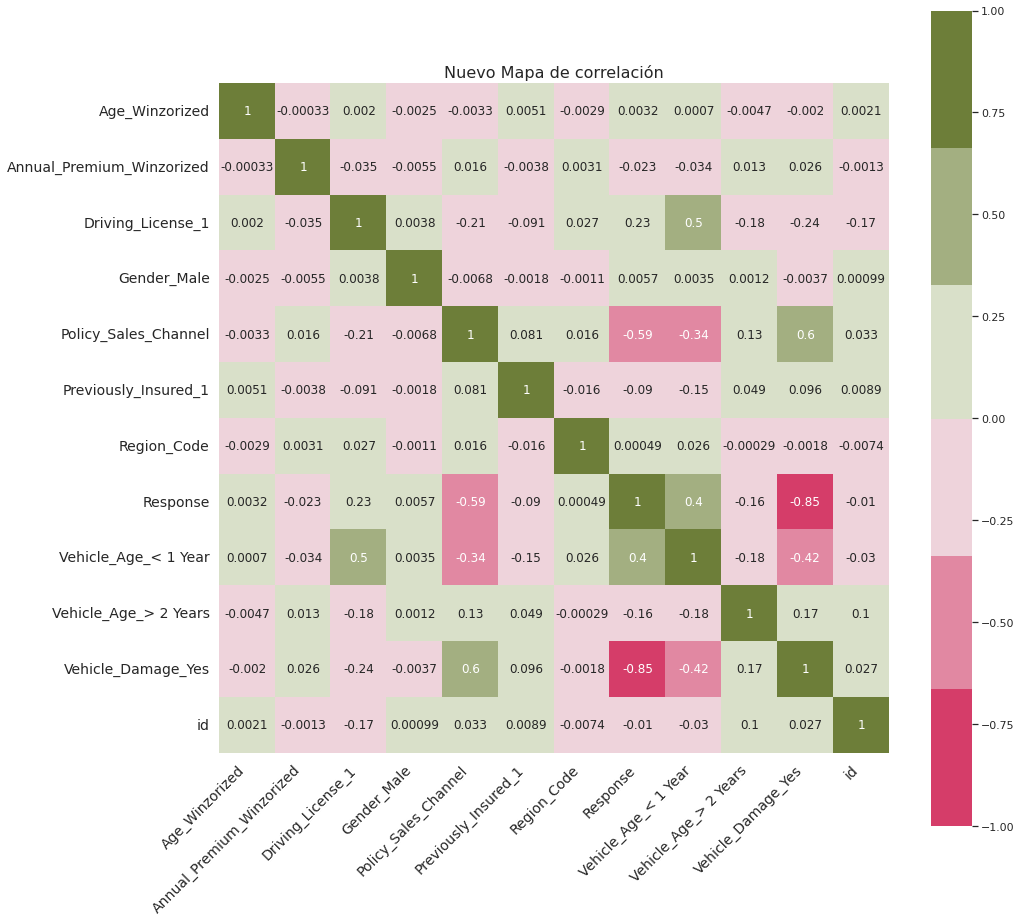

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
sns.heatmap(
    df_sin_corr.corr(),
    annot     = True,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = paletaColores,
    square    = True,
    ax        = ax
).set_title("Nuevo Mapa de correlación", fontsize = 16)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 14)

## Implementación de Modelos

En primer lugar separamos el target del dataframe. 

In [31]:
data = df_sin_corr.drop(columns = "Response")
targets = df_sin_corr["Response"]
x = data
y = targets

Luego, hacemos la Partición en train y test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

### Definicion de Modelos

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Parameters DecisionTreeClassifier:

*   criterion --> 'gini' or 'entropy' --> La funcion para medir la calidad de una division.
*   splitter --> 'best' or 'random' --> Estrategia utilizada para eleigir la division en cada nodo. Elegir la mejor. 
*   max_depth --> profunidad
*   min_samples_leaf --> numero minimo de muestras requerido para estar en un nodo hoja. Un punto de división en cualquier profundidad sólo se considerará si deja al menos min_samples_leaf muestras de entrenamiento en cada una de las ramas izquierda y derecha. Esto puede tener el efecto de suavizar el modelo, especialmente en la regresión.
 --> Si es int, entonces considera min_samples_leaf como el número mínimo.
 --> Si es float, entonces min_samples_leaf es una fracción y ceil(min_samples_leaf * n_samples) son el número mínimo de muestras para cada nodo.  






In [63]:
decisionTree = DecisionTreeClassifier()

In [64]:
logisticRegression = LogisticRegression()

In [ ]:
bagging = BaggingClassifier()

In [ ]:
randomForest = RandomForestClassifier()

In [ ]:
gradientBoosting = GradientBoostingClassifier()

### Declaración de Parametros

In [65]:
parametersTree = {
    "criterion" : ['entropy', 'gini'],
    "max_depth":[None,5,10,15,20],
    "min_samples_leaf":[None,1,2,4,8],
    "min_samples_split":[None,1,2,4,8],
    "random_state":[42],}

parametersLogisticRegression = {
    "penalty" : ['l1','l2'],
    "C":[0.1, 0.3, 0.5, 0.8, 1.0],
    "max_iter":[10,50,80, 100],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "random_state": [42]}



### Busqueda de Mejores Parametros para cada modelo 

In [38]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree

In [66]:
gridTree = GridSearchCV(decisionTree,
                  parametersTree,
                  scoring='accuracy',
                  cv=5,
                  return_train_score=True,
                  verbose=1)

In [67]:
gridTree.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
650 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    if not 0.0 < self.min_samples_leaf <= 0.5:
TypeError: '<' not supported between instances of 'flo

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [None, 1, 2, 4, 8],
                         'min_samples_split': [None, 1, 2, 4, 8],
                         'random_state': [42]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [68]:
gridTree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'random_state': 42}

#### Logistic Regression

In [69]:
gridLogisticRegression = GridSearchCV(logisticRegression,
                  parametersLogisticRegression,
                  scoring='accuracy',
                  cv=5,
                  return_train_score=True,
                  verbose=1)

In [70]:
gridLogisticRegression.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.8, 1.0],
                         'max_iter': [10, 50, 80, 100], 'penalty': ['l1', 'l2'],
                         'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [71]:
gridLogisticRegression.best_params_

{'C': 0.1,
 'max_iter': 10,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

### Representacion de Mejores Parametros

### Entrenamiento de modelos con mejores parametros

#### Decision Tree

In [72]:
treeMP = DecisionTreeClassifier(**gridTree.best_params_)

In [73]:
treeMP.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       random_state=42)

#### Logistic Regression

In [74]:
logisticRegressionMP = LogisticRegression(**gridLogisticRegression.best_params_)

In [75]:
logisticRegressionMP.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=0.1, max_iter=10, penalty='l1', random_state=42,
                   solver='liblinear')

#### Bagging

In [ ]:
baggingMP.fit(X_train, y_train)

In [ ]:
baggingMP = BaggingClassifier(n_estimators=10,
                              max_samples=10,
                              random_state=42)

#### RandomForest

In [ ]:
randomForestMP = RandomForestClassifier(random_state=42, 
                                n_estimators=100,
                                max_features=4,
                                max_samples=50,                                
                                criterion='gini',
                                max_depth=2, 
                                min_samples_leaf=50, 
                                min_samples_split=50)

In [ ]:
randomForestMP.fit(X_train, y_train)

#### GradientBoosting

In [ ]:
gradientBoostingMP= GradientBoostingClassifier(n_estimators=200, 
                                    learning_rate=0.01,
                                    subsample=1,
                                    random_state=42,
                                    max_depth=8, 
                                    min_samples_leaf=2, 
                                    min_samples_split=10)

In [ ]:
gradientBoostingMP.fit(X_train, y_train)

### Evaluacion de los modelos

Declaramos la siguiente funcion para evaluar cada uno de los modelos. 

In [61]:
def evaluateAccuracy(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("Model:", model)
    print(f"ACCURACY TRAIN: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ACCURACY TEST: {accuracy_score(y_test, y_test_pred):.4f}")
    print("\n")
    

In [76]:
evaluateAccuracy(treeMP, X_train, X_test, y_train, y_test)

Model: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       random_state=42)
ACCURACY TRAIN: 0.9507
ACCURACY TEST: 0.9487




In [77]:
evaluateAccuracy(logisticRegressionMP, X_train, X_test, y_train, y_test)

Model: LogisticRegression(C=0.1, max_iter=10, penalty='l1', random_state=42,
                   solver='liblinear')
ACCURACY TRAIN: 0.9497
ACCURACY TEST: 0.9480




In [ ]:
evaluateAccuracy(regresionLinealLassoMP, X_train, X_test, y_train, y_test)

In [ ]:
evaluateAccuracy(regresionLinealRidgeMP, X_train, X_test, y_train, y_test)

In [ ]:
evaluateAccuracy(baggingMP, X_train, X_test, y_train, y_test)

In [ ]:
evaluateAccuracy(randomForestMP, X_train, X_test, y_train, y_test)

In [ ]:
evaluateAccuracy(gradientBoostingMP, X_train, X_test, y_train, y_test)

### Conlusiones

#### Mejor Modelo

 * ACURRACY DE CADA MODELO
 * CONSIDERAR CUAL FUE EL MEJOR

#### Importancia del data cleaning y uso de mejores parámetros

Evaluamos el modelo Árbol con el dataset sin aplicar Data Cleaning para los parámetros por defecto y para los mejores parámetros del modelo obtenidos anteriormente:

In [ ]:
data2 = dfDummy.drop(columns = "Response")
targets2 = dfDummy["Response"]
x2 = data2
y2 = targets2

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.30, random_state = 42)

In [ ]:
arbolSinDataClining_ParamsDefault = DecisionTreeClassifier()

In [ ]:
arbolSinDataClining_ParamsDefault.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [ ]:
evaluateAccuracy(arbolSinDataClining_ParamsDefault, X_train2, X_test2, y_train2, y_test2)

ACCURACY TRAIN: 1.0000
ACCURACY TEST: 0.7177




In [ ]:
arbolSinDataClining_MejoresParams = DecisionTreeClassifier(**gridArbol.best_params_)

In [ ]:
arbolSinDataClining_MejoresParams.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)

In [ ]:
evaluateAccuracy(arbolSinDataClining_MejoresParams, X_train2, X_test2, y_train2, y_test2)

ACCURACY TRAIN: 0.8026
ACCURACY TEST: 0.7927




Pudimos observar que: 
* Sin aplicar Data Cleaning y con los parámetros por defecto, el algoritmo hace sobre ajuste de datos (alta varianza) y tiene un alto sesgo.
* Sin aplicar Data Cleaning y con los mejores parámetros, el algoritmo tiene baja varianza pero se mantiene el alto sesgo.
* Aplicando Data Cleaning y con los mejores parámetros, obtenemos baja varianza y bajo sesgo.